### MSc Computer Science, Data Science @UniPD
### Optimization Methods for Data Science
---

In [5]:
from os.path import isdir
from os import mkdir

env = 'colab'  # 'pc', 'colab'
git_download_path = 'https://raw.githubusercontent.com/PashaIanko/Semi-Supervised-Labelling/master/'
experiment = 'Exp5000/'

exp_dir = ''
if env == 'pc':
    exp_dir = f'C:/Users/79137/Pasha/2. UNIPD/Semester 2/Optimization for Data Science/Homeworks/HW 1/Semi-Supervised-Labelling/{experiment}'
elif env == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')
    exp_dir = f'/content/drive/MyDrive/UNIPD/ODS/HW1/{experiment}'

assert(isdir(exp_dir))

Mounted at /content/drive


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import log
import numpy as np

In [7]:
from os.path import isfile

exp_params = pd.read_csv(f'{exp_dir}experiment_params.csv')
exp_params.head()

,Unnamed: 0,iters_limit,d_loss_limit,delta_percent_limit,stop_loss,learning_rate,n points
0,0,17,0.0,"(0.1,)",0,0.0001,5000


In [8]:
metrics_res = pd.read_csv(f'{exp_dir}metrics res.csv', index_col=[0])
metrics_res.head()

,CPU total time,N iterations,Final accuracy,CPU total time_norm,N iterations_norm,Final accuracy_norm
GD,1026.019222,17,0.9994,0.994333,1.0,1.0
BCGD permutation,1031.866820,17,0.9994,1.000000,1.0,1.0
BCGD cyclic,1024.089275,17,0.9994,0.992463,1.0,1.0


In [9]:
train_res = pd.read_csv(f'{exp_dir}res.csv')
train_res.head()

,Unnamed: 0,GD loss,BCGD permutation loss,BCGD cyclic loss,GD cpu,BCGD permutation cpu,BCGD cyclic cpu,GD acc,BCGD permutation acc,BCGD cyclic acc
0,0,102822.879849,102822.879849,102822.879849,32.580240,31.805783,31.957732,0.0500,0.0500,0.0500
1,1,100919.573599,100677.513717,100677.492523,93.537116,91.309780,92.131825,0.9998,0.9996,0.9996
2,2,99477.478172,99115.507985,99114.436376,155.220142,151.082508,155.612063,0.9996,0.9996,0.9996
3,3,98371.393596,97962.779336,97959.392699,215.138698,211.566440,215.796504,0.9996,0.9996,0.9996
4,4,97516.211630,97103.870050,97098.135533,275.282627,271.722381,275.638757,0.9996,0.9996,0.9996


# Data visualization

Found 2500 instances of object 0
We have to delabel 2375 instances
Found 2500 instances of object 1
We have to delabel 2375 instances


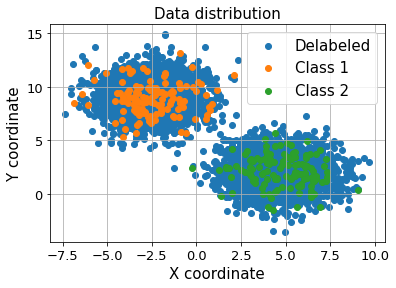

In [19]:
from sklearn.datasets import make_blobs
from numpy import unique


X, Y = make_blobs(
    n_samples = 5000,
    centers = 2,
    n_features = 2,
    random_state = 42,
    cluster_std = 1.5
)

def plot_clusters(X, Y):
    font = 15
    legend_size = 15
    tick_size = 13

    clusters = unique(Y)
    fig, ax = plt.subplots()

    for c in clusters:
        mask = Y == c
        subset = X[mask]
        ax.scatter(
            subset[:, 0],
            subset[:, 1],
            marker = 'o',
            # markerfacecolor = 'white'
        )
    plt.legend(
        ['Delabeled', 'Class 1', 'Class 2'],
        prop = {'size': legend_size}
    )

    
    plt.xlabel('X coordinate', fontsize = font)
    plt.ylabel('Y coordinate', fontsize = font)
    plt.title('Data distribution', fontsize = font)
    plt.tick_params(axis = 'both', labelsize = tick_size)
    plt.grid()

def delabel_data (labeled_data, labeled_percent, delabel_value):
    res = np.ndarray.copy(labeled_data)
    clusters_ids = np.unique(labeled_data)

    for cluster_id in clusters_ids:
        # find indices of object, labeled as cluster_id
        # we keep 'labeled_percent' points still labeled

        cluster_indices = np.where(labeled_data == cluster_id)[0]
        print(f'Found {len(cluster_indices)} instances of object {cluster_id}')

        n_to_delabel = int(len(cluster_indices) * (1 - labeled_percent))
        print(f'We have to delabel {n_to_delabel} instances')

        # we choose data to delabel randomly
        indices_to_delabel = np.random.choice(
            len(cluster_indices - 1),
            n_to_delabel,
            replace = False
        )

        assert len(indices_to_delabel) == n_to_delabel, print(len(indices_to_delabel))
        assert np.max(indices_to_delabel) < len(res)
        assert np.max(indices_to_delabel) <= np.max(cluster_indices)

        res[
            cluster_indices[indices_to_delabel]
        ] = delabel_value
    return res

Y_delabeled = delabel_data(Y, 0.05, delabel_value = -1)
plot_clusters(X, Y_delabeled)

# Losses VS iterations

In [20]:
cols_with_loss = [c for c in train_res.columns if 'loss' in c]
loss_dict = {}

for c in cols_with_loss:
    loss = train_res[c].values
    model_name = ' '.join(c.split(' ')[:-1])
    loss_dict[model_name] = loss

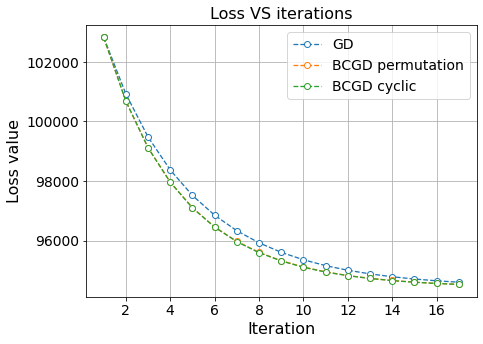

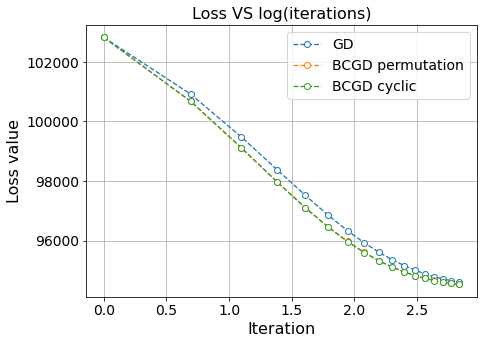

In [22]:
def plot_curves(curves_dict, title, y_label, figsize, log_axis_):
    font = 16
    legend_size = 14
    label_size = 14

    _, ax = plt.subplots(figsize = figsize)

    for _, curve_res in curves_dict.items():

        x_data = []
        if log_axis_:
            x_data = [log(i + 1) for i in range(len(curve_res))]
        else:
            x_data = [i+1 for i in range(len(curve_res))]

        ax.plot(
            x_data,
            curve_res,
            marker = 'o',
            linestyle = '--',
            linewidth = 1.3,
            markerfacecolor = 'white',
            # markersize = 2
        )

    

    plt.legend(list(curves_dict.keys()), prop = {'size': legend_size})
    plt.title(title, fontsize = font)
    plt.xlabel('Iteration', fontsize = font)
    plt.ylabel(y_label, fontsize = font)
    plt.tick_params(axis = 'both', labelsize = label_size)
    plt.grid()


plot_curves(
    loss_dict,
    'Loss VS iterations',
    y_label = 'Loss value',
    figsize = (7, 5),
    log_axis_=False
)

plot_curves(
    loss_dict,
    'Loss VS log(iterations)',
    y_label = 'Loss value',
    figsize = (7, 5),
    log_axis_=True
)

# Losses VS CPU

In [23]:
train_res.head()

,Unnamed: 0,GD loss,BCGD permutation loss,BCGD cyclic loss,GD cpu,BCGD permutation cpu,BCGD cyclic cpu,GD acc,BCGD permutation acc,BCGD cyclic acc
0,0,102822.879849,102822.879849,102822.879849,32.580240,31.805783,31.957732,0.0500,0.0500,0.0500
1,1,100919.573599,100677.513717,100677.492523,93.537116,91.309780,92.131825,0.9998,0.9996,0.9996
2,2,99477.478172,99115.507985,99114.436376,155.220142,151.082508,155.612063,0.9996,0.9996,0.9996
3,3,98371.393596,97962.779336,97959.392699,215.138698,211.566440,215.796504,0.9996,0.9996,0.9996
4,4,97516.211630,97103.870050,97098.135533,275.282627,271.722381,275.638757,0.9996,0.9996,0.9996


In [35]:
cols_with_cpu = [c for c in train_res.columns if 'cpu' in c]
cpu_dict = {}
for c in cols_with_cpu:
    cpu = train_res[c]
    model_name = ' '.join(c.split(' ')[:-1])
    cpu_dict[model_name] = cpu

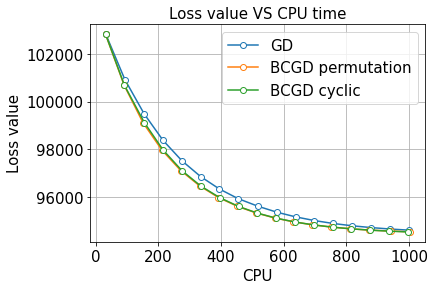

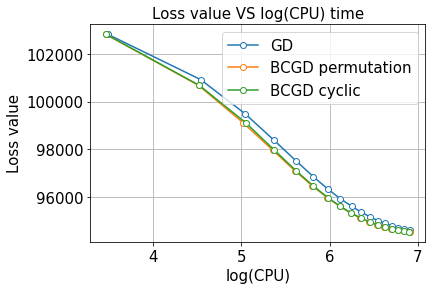

In [36]:
def plot_loss_vs_cpu(loss_dict_, cpu_dict_, log_axis_, title_, xlabel_):
    font = 15
    legend_size = 15
    label_size = 15

    fig, ax = plt.subplots()
    assert(loss_dict_.keys() == cpu_dict_.keys())
    
    for model_name, loss in loss_dict_.items(): 
        cpu = cpu_dict_[model_name]

        if log_axis_:
            cpu = log(cpu)


        ax.plot(
            cpu, 
            loss,
            marker = 'o',
            markerfacecolor = 'white'
        )
    

    plt.legend(loss_dict_.keys(), prop = {'size': legend_size})
    plt.xlabel(xlabel_, fontsize = font)
    plt.ylabel('Loss value', fontsize = font)
    plt.title(title_, fontsize = font)
    plt.tick_params(axis = 'both', labelsize = label_size)
    plt.grid()

    


plot_loss_vs_cpu(
    loss_dict, 
    cpu_dict,
    log_axis_ = False,
    title_ = 'Loss value VS CPU time',
    xlabel_ = 'CPU'
)

plot_loss_vs_cpu(
    loss_dict, 
    cpu_dict,
    log_axis_ = True,
    title_ = 'Loss value VS log(CPU) time',
    xlabel_ = 'log(CPU)'
)

# Accuracies VS iterations

In [27]:
train_res.head()

,Unnamed: 0,GD loss,BCGD permutation loss,BCGD cyclic loss,GD cpu,BCGD permutation cpu,BCGD cyclic cpu,GD acc,BCGD permutation acc,BCGD cyclic acc
0,0,102822.879849,102822.879849,102822.879849,32.580240,31.805783,31.957732,0.0500,0.0500,0.0500
1,1,100919.573599,100677.513717,100677.492523,93.537116,91.309780,92.131825,0.9998,0.9996,0.9996
2,2,99477.478172,99115.507985,99114.436376,155.220142,151.082508,155.612063,0.9996,0.9996,0.9996
3,3,98371.393596,97962.779336,97959.392699,215.138698,211.566440,215.796504,0.9996,0.9996,0.9996
4,4,97516.211630,97103.870050,97098.135533,275.282627,271.722381,275.638757,0.9996,0.9996,0.9996


In [28]:
acc_cols = [c for c in train_res.columns if 'acc' in c]
acc_cols

['GD acc', 'BCGD permutation acc', 'BCGD cyclic acc']

In [29]:
acc_dict = {}
for acc_col in acc_cols:
    key = ' '.join(acc_col.split(' ')[: -1])
    value = train_res[acc_col]
    acc_dict[key] = value

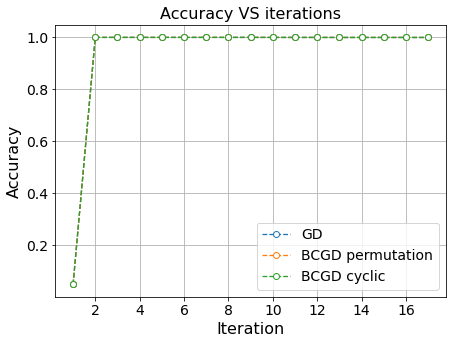

In [30]:
plot_curves(
    acc_dict, 
    'Accuracy VS iterations', 
    'Accuracy', 
    figsize = (7, 5), 
    log_axis_=False
)

# Performance metrics

In [31]:
metrics_res.head()

,CPU total time,N iterations,Final accuracy,CPU total time_norm,N iterations_norm,Final accuracy_norm
GD,1026.019222,17,0.9994,0.994333,1.0,1.0
BCGD permutation,1031.866820,17,0.9994,1.000000,1.0,1.0
BCGD cyclic,1024.089275,17,0.9994,0.992463,1.0,1.0


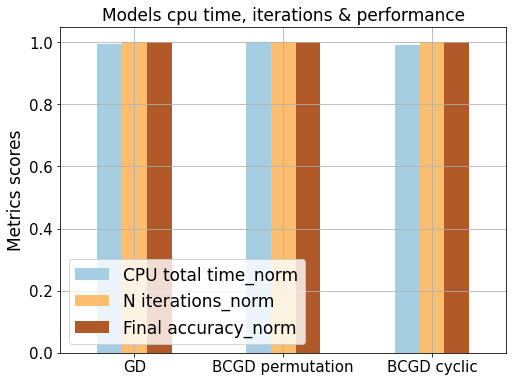

In [38]:
def plot_bar_metrics(metrics_df):
    
    ax = metrics_df.plot.bar(
        rot = 0,
        ylabel = 'Metrics results',
        cmap = 'Paired',
        figsize = (8, 6)
    )

    label_size = 15
    legend_size = 17
    font_size = 17

    ax.set_title('Models cpu time, iterations & performance', fontsize = font_size)
    # ax.set_xlabel(list(metrics_df.index))
    ax.set_ylabel('Metrics scores', fontsize = font_size)
    ax.tick_params(axis = 'y', labelsize = label_size)
    ax.tick_params(axis = 'x', labelsize = label_size)
    ax.legend(loc = 3, prop = {'size': legend_size})
    plt.grid()

metrics_cols = [c for c in metrics_res.columns if '_norm' in c]
plot_bar_metrics(metrics_res.loc[:, metrics_cols])